<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/10_decision_tree/Decision_Tree_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Steel Plant Faults with Decision Trees

## Context

Welcome to the **Scaler Industrial** Development data analysis team! Our current project aims to improve the quality control process in steel manufacturing. Your expertise is requested to analyze the Steel Plant Faults dataset, utilizing Decision Trees to classify different types of steel plate faults. This task will help in automating the identification of defects and ensuring high standards in steel production.

## Dataset Description

The dataset you will analyze includes a variety of attributes that describe defects found in steel plates. These defects are classified into seven distinct categories, each representing a specific type of fault:

### Steel Plate Fault Types:
1. **Pastry:** Small patches or irregularities on the surface of the steel plate.
2. **Z_Scratch:** Narrow, parallel scratches or marks in the direction of rolling.
3. **K_Scratch:** Scratches similar to Z-scratches, but perpendicular to the rolling direction.
4. **Stains:** Discolored or contaminated areas on the steel surface.
5. **Dirtiness:** Presence of dirt or particulate matter on the steel surface.
6. **Bumps:** Raised or protruding areas on the steel surface.
7. **Other_Faults:** A broad category for faults not specifically mentioned in the other types.


In [3]:
# Download the dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv

--2025-01-06 08:03:54--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.129, 13.224.9.103, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3133750 (3.0M) [text/plain]
Saving to: ‘SteelPlant.csv’

SteelPlant.csv      100%[===================>]   2.99M  --.-KB/s    in 0.07s   

2025-01-06 08:03:54 (45.2 MB/s) - ‘SteelPlant.csv’ saved [3133750/3133750]



In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

df = pd.read_csv("SteelPlant.csv")

df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


# Assesment for DT Lecture 1



---

## Decision Tree parametric algo

#### Task:  
Before we can utilize DT to classify steel plate faults, let's revisit the fundamental characteristics of the algorithm.

#### Question:  
Is the Decision Tree a parametric algorithm?

#### Options:

A] Yes

B] No



---

## Root Entropy for Decision Tree

#### Context:
In a Decision Tree classifier, entropy is a crucial measure used to determine the impurity of a node. In the context of the Steel Plant Faults dataset, understanding how to calculate the root entropy will provide insights into the initial uncertainty before any splits.

#### Task:
Write Python code to transform one-hot encoded fault types into a single 'Target' column and calculate the root entropy. This process involves aggregating multiple binary fault type columns into a single categorical column and then applying the entropy formula.

#### Instructions:
1. **Create the 'Target' Column:** Combine the one-hot encoded fault type columns ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults') into a single 'Target' column that contains the fault type with the maximum value for each row.
2. **Entropy Calculation Function:** Define a function `entropy_calc` that calculates the entropy for the 'Target' column, utilizing the probabilities of each fault type.
3. **Compute Root Entropy:** Apply the `entropy_calc` function to the 'Target' column to find the root entropy and print the result.

#### Question:
For this task, how do you transform the one-hot encoded fault types into a single 'Target' column and calculate the root entropy?



In [6]:
import numpy as np

fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Target'] = df[fault_types].idxmax(axis=1)

# TODO: Function to calculate entropy
def entropy_calc(y):
    probabilities = y.value_counts(normalize=True).to_numpy() # Hint: Pandas function to count the frequency for each category.
    entropies = -probabilities * np.log2(probabilities)  # Using log base 2 for entropy calculation
    return round(np.sum(entropies), 2)

# Calculate root entropy
root_entropy = entropy_calc(df['Target'])
print(f"The root entropy is: {root_entropy}")

The root entropy is: 2.36




---

## Preprocessing for DT


#### Context:
In the preparation phase for applying a Decision Tree (DT) classifier to the Steel Plant Faults dataset, various preprocessing steps are considered. It's crucial to identify which of these steps is unnecessary for DT, given its unique properties and how it handles data.

#### Question:
Which preprocessing step can be generally avoided when implementing a Decision Tree for the Steel Plant Faults dataset, where features are on different scales?

#### Options:
A) Feature Selection

B) Feature Scaling

C) SMOTE

D) Encoding





---
## Understanding Decision Tree Characteristics

#### Context:
In building a Decision Tree (DT) for classification, various concepts and methods play a crucial role in the tree's construction and decision-making process. Understanding these aspects is essential for effectively applying DT in practical scenarios.

#### Question:
Which of the following statements are correct regarding the construction and characteristics of a Decision Tree?

#### Statements to Evaluate:
S1: Fill the missing attribute value with the Central Tendency (mean, median, mode) of the attribute.

S2: Decision Trees can handle both numerical and categorical data.

S3: The root Node is the top-most node of the Tree from where the Tree starts.

S4: Information gain is the difference between the entropy of the parent and the weighted average entropy of the children.

#### Options:
A) S1, S2, S4

B) S2, S3, S4

C) S1, S2, S3

D) S1, S2, S3, S4





---

## Assessing Dataset Balance for Decision Tree Implementation

#### Context:
Understanding the distribution of classes in a dataset is essential for machine learning tasks, particularly for classification. The balance or imbalance of the dataset can influence the performance and decision-making process of a Decision Tree (DT) classifier.

#### Task:
You are asked to write a Python script that visualizes the distribution of classes in the Steel Plant Faults dataset to assess its balance. Based on this analysis, you will determine the necessity of applying imbalance-handling techniques when implementing a DT.

#### Instructions:
1. **Visualize Class Distribution:** Create a bar plot to visualize the count of each fault type ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults') in the dataset.
2. **Analyze the Plot:** Examine the bar plot to assess whether the dataset is balanced or imbalanced across the different fault types.
3. **Decision Tree Consideration:** Decide whether a DT classifier would require imbalance-handling techniques based on the class distribution.

#### Question:
Based on your analysis of the class distribution in the Steel Plant Faults dataset, is the dataset balanced, and should an imbalance-handling algorithm be applied when implementing a Decision Tree?

#### Options:
A) The dataset is balanced, and Decision Trees are not affected by data imbalance.

B) The dataset is imbalanced, but Decision Trees are not significantly affected by data imbalance.

C) The dataset is balanced, but Decision Trees are affected by data imbalance.

D) The dataset is imbalanced, and Decision Trees are affected by data imbalance.

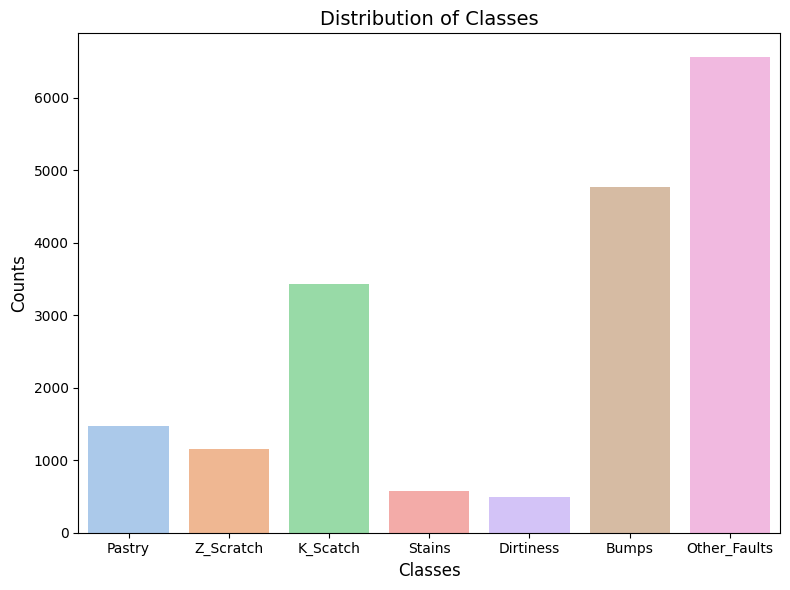

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# TODO: Count number of data points for each fault type
fault_counts = df[fault_types].sum()

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# TODO: Create the bar plot to visualize the count of each fault type
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(x=fault_types, y=fault_counts.to_numpy(), palette=custom_palette)

# Customize labels and title
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Distribution of Classes", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()



---

## Find Root Node

#### Context:
In a Decision Tree, the root node is pivotal as it represents the initial decision point from which further splits are derived. The Gini value at this node offers insight into the node's purity. This exercise involves training a Decision Tree using only two features from the Steel Plant Faults dataset and determining the root node's feature and its Gini value.

#### Task:
Train a Decision Tree classifier using 'Pixels_Areas' and 'SigmoidOfAreas' as features. Set the `max_depth` to 3 and `random_state` to 42. Determine which feature is chosen as the root node and identify its Gini value.

#### Instructions:
1. **Feature Selection:** Use 'Pixels_Areas' and 'SigmoidOfAreas' as your features for the Decision Tree.
2. **Data Splitting:** Split the dataset into training and testing sets.
3. **Model Initialization:** Initialize a Decision Tree Classifier with `max_depth=3` and `random_state=42`.
4. **Model Training:** Train the Decision Tree on the training data.
5. **Root Node Identification:** Identify the feature used at the root node and find its Gini value.

#### Question:
After training the Decision Tree with the specified hyperparameters using 'Pixels_Areas' and 'SigmoidOfAreas' as features, which feature becomes the root node, and what is its Gini value?

#### Options:
A) 'Pixels_Areas' is the root node, with a Gini value of X.

B) 'SigmoidOfAreas' is the root node, with a Gini value of Y.

C) Both 'Pixels_Areas' and 'SigmoidOfAreas' share the root node, with Gini values of X and Y respectively.

D) Neither 'Pixels_Areas' nor 'SigmoidOfAreas' becomes the root node.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# TODO: Selecting the two features for training
X = df[['Pixels_Areas', 'SigmoidOfAreas']]
y = df['Target']

# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# TODO: Initialize the Decision Tree Classifier with maximum depth if 3 and random_state=42
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# TODO: Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# TODO: Getting the root node feature name and its Gini value
# Hint - use documentation to find the property to access the values.
root_node_feature_index = dt_classifier.tree_.feature[0]
root_node_feature_name = X.columns[root_node_feature_index]
root_node_gini_value = dt_classifier.tree_.impurity[0]

print(f"The root node feature is: {root_node_feature_name}")
print(f"The Gini value of the root node is: {root_node_gini_value:.2f}")

The root node feature is: Pixels_Areas
The Gini value of the root node is: 0.77




---

# Assesment for DT Lecture 2



---
## DT- Root Split

#### Context:  
Understanding the sensitivity of a Decision Tree's structure to changes in the training data can provide insights into the model's stability and robustness. Removing a data point from the dataset may affect the tree's formation, particularly the feature and threshold selected for the root node's split.

#### Task:  
Consider a scenario where you remove one data point from the dataset used to train a Decision Tree.

#### Question:  
Which option is true regarding the splitting criteria at the root of the tree if one of the data points is removed?

#### Options:  
A) The splitting criteria at the root will be the same.  
B) The splitting criteria at the root will be different.  
C) The splitting criteria at the root could be the same or different.  
D) The splitting criteria at the root can’t be related to this removal of the data point.






---

## Most Misclassified DT

#### Context:
Using class weights in a Decision Tree can help address class imbalance by adjusting the decision criteria toward less represented classes. This task involves applying class weights to a Decision Tree classifier and identifying the class that is most frequently misclassified.

#### Task:
Write Python code to train a Decision Tree classifier using entropy as the criterion and balanced class weights. Your goal is to determine which class is most misclassified on the test dataset.

#### Instructions:
1. **Feature and Target Selection:** Prepare your features `X` by dropping the class columns and 'Target', and set `y` as your 'Target'.
2. **Data Splitting:** Split the dataset into training and testing sets using `train_test_split` with `random_state=42`.
3. **Class Weights Calculation:** Use the 'balanced' option for class weights to handle class imbalance.
4. **Initialize and Train Decision Tree:** Create a Decision Tree classifier with entropy criterion, incorporating the calculated class weights. Train this classifier on your training data.
5. **Model Prediction and Evaluation:** Use the trained model to predict the classes on the test data. Generate a classification report to evaluate the model's performance across different classes.
6. **Identify Most Misclassified Class:** Analyze the recall values from the classification report to identify which class is the most misclassified.

#### Question:
After applying the described Decision Tree configuration and analyzing the classification report, which class is identified as the most misclassified?

#### Options:
A) Bumps

B) Other_Faults

C) Dirtiness

D) Pastry



In [9]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'Target'],
      dtype='object')

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Prepare our features for training
X = df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'Target'], axis =1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# TODO: Initialize the Decision Tree classifier with the given hyperparameters and class weights
# Hint: Use documentation to find how to balance the class_weights in DecisionTrees
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight="balanced")

# TODO: Train the Decision Tree classifier on training data
dt_classifier.fit(X_train, y_train)

# TODO: Predict on the test data
y_pred = dt_classifier.predict(X_test)

# TODO: Generate a classification report to include the metrics for each class
report = classification_report(y_test, y_pred, target_names=np.unique(y_train))
print(report)

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1165
   Dirtiness       0.14      0.18      0.16       107
    K_Scatch       0.83      0.83      0.83       852
Other_Faults       0.41      0.39      0.40      1671
      Pastry       0.22      0.21      0.22       605
      Stains       0.62      0.65      0.63       130
   Z_Scratch       0.40      0.44      0.42       275

    accuracy                           0.45      4805
   macro avg       0.43      0.44      0.44      4805
weighted avg       0.45      0.45      0.45      4805





---

## Splitting Data

#### Context:
In Decision Trees, achieving a node where each child contains samples exclusively from one class represents an ideal split where classes are perfectly separated. Such scenarios prompt specific decisions on how to proceed with further splits or terminate the tree building process.

#### Task:
You have a Decision Tree where the feature `X_minimum` leads to a node split such that each of its 7 children contains samples belonging exclusively to one class. Decide the next steps in the tree construction process.

#### Question:
If using the feature `X_minimum` results in each child node containing samples from exactly one class, what should you do next?

#### Options:
A) Find another feature to split the node further.

B) Declare it as a leaf node since it is a pure node.

C) Always terminate the recursions on all branches and return the current tree.

D) Go back to the parent node and select a different feature to split the data so that y-values are not all the same at this node.




---

## Decision Trees Characteristics

#### Context:  
Decision Trees are a fundamental machine learning algorithm used for both classification and regression tasks. Understanding their characteristics, capabilities, and limitations is crucial for effectively applying them to solve real-world problems.

#### Question:  
Which of the following statements are true regarding the properties and behavior of Decision Trees?

#### Statements to Evaluate:  
1\. Decision tree makes no assumptions about the data.  
2\. The decision tree model can learn non-linear decision boundaries.  
3\. Decision trees cannot explain how the target will change if a variable is changed by 1 unit (marginal effect).  
4\. Hyperparameter tuning is not required in decision trees.  
5\. In a decision tree, increasing entropy implies increasing purity.  
6\. In a decision tree, the entropy of a node decreases as we go down the decision tree.

#### Options:  
A) 1, 2, and 5  
B) 3, 5, and 6  
C) 2, 3, 4, and 5  
D) 1, 2, 3, and 6



---
## Optimizing Decision Tree Depth

#### Context:
Cross-validation is an essential technique for assessing the generalizability of machine learning models. In this task, you will use k-fold cross-validation to determine the optimal depth for a Decision Tree classifier that maximizes accuracy on a given dataset.

#### Task:
Write Python code to perform k-fold cross-validation on a series of Decision Tree models with varying depths. The goal is to identify the tree depth that results in the best performance on the test data.

#### Instructions:
1. **Define Depth Values:** Use the list of depths `[3, 5, 7, 11, 13, 15, 19, 20]` to evaluate which tree depth provides the best model performance.
2. **Initialize K-Fold Cross-Validation:** Set up a `KFold` instance with 10 splits and `random_state=42` to ensure reproducibility.
3. **Cross-Validation Loop:** For each depth in your list, initialize a Decision Tree with `class_weight='balanced'`. Perform cross-validation and record the training and validation accuracies.
4. **Determine Best Depth:** Analyze the cross-validation results to select the depth that provides the highest validation accuracy.
5. **Train and Evaluate the Best Model:** Using the identified best depth, train a new Decision Tree on the entire training set and evaluate its performance on the test set.

#### Question:
Based on your cross-validation results, which depth should be selected for the Decision Tree to achieve optimal performance, and what is the test accuracy for this depth?

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

# Define the list of tree depths you want to evaluate
depths = [3, 5, 7, 11, 13, 15, 19, 20]

# TODO: Setup KFold with 10 splits and a fixed random state
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for depth in depths:
    # TODO: Initialize Decision Tree Classifier with the current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')

    # TODO: Perform cross-validation
    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

    # Output the mean and standard deviation of the training and validation scores
    print(f"K-Fold for depth: {depth} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%")
    print(f"K-Fold for depth: {depth} - Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    print('***************')

# Testing the best depth on the testing data
best_tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
best_tree_clf.fit(X_train, y_train)
print(f"The model accuracy on testing data with best depth is {best_tree_clf.score(X_test, y_test)}")

K-Fold for depth: 3 - Accuracy Mean: Train: 42.29%, Validation: 42.19%
K-Fold for depth: 3 - Accuracy Std: Train: 0.32%, Validation: 1.25%
***************
K-Fold for depth: 5 - Accuracy Mean: Train: 50.11%, Validation: 49.67%
K-Fold for depth: 5 - Accuracy Std: Train: 1.49%, Validation: 1.45%
***************
K-Fold for depth: 7 - Accuracy Mean: Train: 46.70%, Validation: 44.65%
K-Fold for depth: 7 - Accuracy Std: Train: 0.83%, Validation: 1.41%
***************
K-Fold for depth: 11 - Accuracy Mean: Train: 57.57%, Validation: 46.70%
K-Fold for depth: 11 - Accuracy Std: Train: 0.65%, Validation: 0.90%
***************
K-Fold for depth: 13 - Accuracy Mean: Train: 65.73%, Validation: 48.12%
K-Fold for depth: 13 - Accuracy Std: Train: 0.43%, Validation: 1.45%
***************
K-Fold for depth: 15 - Accuracy Mean: Train: 74.58%, Validation: 48.15%
K-Fold for depth: 15 - Accuracy Std: Train: 0.76%, Validation: 1.14%
***************
K-Fold for depth: 19 - Accuracy Mean: Train: 88.18%, Validation:



---

## DT - Feature Importance

#### Context:
Understanding which features most significantly impact the predictions of a Decision Tree is crucial for refining models and enhancing interpretability. This task involves identifying the top three features based on their importance scores from a trained Decision Tree.

#### Task:
Write Python code to analyze the feature importance from a Decision Tree (`best_tree_clf`) and identify the top three most influential features.

#### Instructions:
1. **Retrieve Feature Importances:** Extract the importance scores of all features from the `best_tree_clf`.
2. **Rank Features by Importance:** Sort the features by their importance in descending order.
3. **Identify Top Three Features:** Determine the three features with the highest importance scores.
4. **Visualize Feature Importance:** Optionally, create a bar plot to visually represent the importance of each feature, which can aid in understanding their relative contributions to the model's decisions.

#### Question:
After executing your script to analyze feature importances in the Decision Tree, which three features are identified as the most influential based on their importance scores?

#### Options:
A) `Outside_X_Index`, `Pixels_Areas`, `Length_of_Conveyer`

B) `X_Minimum`, `Y_Maximum`, `Sum_of_Luminosity`

C) `Maximum_of_Luminosity`, `Edges_Index`, `Steel_Plate_Thickness`

D) `TypeOfSteel_A300`, `Edges_Y_Index`, `LogOfAreas`



Top 3 features:
1. Outside_X_Index with an importance of 0.3198
2. Pixels_Areas with an importance of 0.2949
3. Length_of_Conveyer with an importance of 0.1254


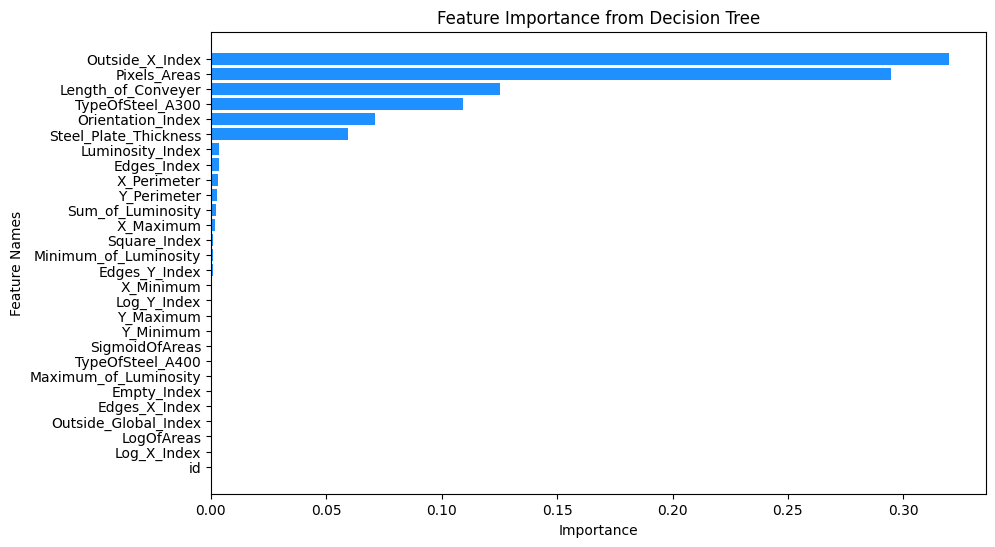

In [13]:
feature_names = X_train.columns

# TODO: Get feature importances of the best_tree_clf from 'previous question'
feature_importances = best_tree_clf.feature_importances_

# TODO: Sort the features by importance (get their indices only not the values. )
sorted_idx = np.argsort(feature_importances)[::-1]  # This sorts indices by importance from high to low

# Output the top 3 features
print("Top 3 features:")
for i in range(3):
    feature_index = sorted_idx[i]
    print(f"{i+1}. {feature_names[feature_index]} with an importance of {feature_importances[feature_index]:.4f}")

sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# TODO: Create a horizontal bar plot for the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center', color='dodgerblue')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()



---

# Assesment for Bagging


## Role of Ensemble Methods


#### Question:
Choose the correct statements concerning the use of ensemble algorithms with Decision Trees in machine learning.

#### Statements to Evaluate:
S1: To improve our Decision Tree model performance, an ensemble algorithm is used.
S2: The Decision Tree model in our dataset was overfitting, hence an ensemble algorithm was used.
S3: Ensemble uses many independent models and aggregates their output.
S4: The Decision Tree model in our dataset was underfitting, hence an ensemble algorithm was used.

#### Options:
A) S1, S2, S3

B) S1, S3, S4

C) S2, S3, S4

D) All of the above




---

## SMOTE imbalance


#### Context:
The Synthetic Minority Over-sampling Technique (SMOTE) is employed to handle class imbalance by generating synthetic samples for minority classes. This technique is crucial for ensuring that machine learning models do not become biased towards the majority class.

#### Task:
Using the SMOTE technique, determine the resulting sample size for each class after applying the algorithm. You are to predict the uniform size that each class will have post-SMOTE, assuming SMOTE balances all classes to the size of the originally largest class.

#### Instructions:
1. **Review Initial Class Distribution:** Start by analyzing the initial distribution of your classes. This will help you understand the extent of the imbalance you need to address.
2. **Apply SMOTE:** Implement the SMOTE technique on your dataset to balance the class distribution. Use `random_state=42` for reproducibility.
3. **Analyze Post-SMOTE Distribution:** After applying SMOTE, examine the new class sizes. All classes should now reflect the size of the largest original class if SMOTE has been applied correctly.
4. **Determine Uniform Class Size:** From the balanced dataset, identify the uniform size to which all classes have been adjusted.

#### Question:
What will be the sample size for each class after applying SMOTE, given that SMOTE adjusts all classes to the size of the largest class present before balancing?

#### Options:
A) 6540

B) 5530

C) 7000

D) 4210



In [ ]:
from imblearn._____ import ____

# TODO: Count class instances before SMOTE from the variable ('y')
print("\Before SMOTE:")
_____

# TODO: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote._____(X, __)

# TODO: Count class instances after SMOTE on variable 'y_resampled'
print("\nAfter SMOTE:")
______



---
## Understanding OOB


#### Context:
In ensemble methods such as Random Forests that utilize bootstrapping, Out-Of-Bag (OOB) data plays a critical role in estimating the model's performance without needing a separate validation set. Understanding what OOB data represents is key to effectively using these ensemble methods in practice.

#### Task:
Explain the concept of OOB data in the context of ensemble models that use bootstrapping techniques.

#### Question:
What does OOB data represent in the context of bootstrapping used in ensemble learning methods?

#### Statements:
S1:  OOB data is the remaining samples which are not selected by bootstrapping.

S2:  OOB data is the remaining samples in the validation dataset.

S3:  OOB data is the used samples which were selected by bootstrapping.

S4:  OOB data is the used samples in the validation dataset.




---

## Comparing OOB Scores

#### Context:
The Out-Of-Bag (OOB) score in Random Forest models offers a unique method of validation by utilizing unsampled data points during the training process as a test set. This task involves comparing the OOB scores of a Random Forest classifier trained on original versus SMOTE-resampled data to evaluate how class balancing affects model performance.

#### Task:
Implement and compare two Random Forest classifiers: one trained on the original dataset and another on a dataset resampled using SMOTE. Your goal is to analyze the difference in OOB scores between these two approaches.

#### Instructions:
1. **Balance the Dataset Using SMOTE:** Apply SMOTE to the original dataset to balance class distributions, ensuring that minority classes are adequately represented.
2. **Split Both Datasets:** Split both the original and the SMOTE-resampled datasets into training and testing sets using a 33% test size and a random state of 42.
3. **Initialize and Train Two Random Forests:** Create two Random Forest classifiers with `oob_score=True` and `random_state=42`. Train one on the original training set and another on the resampled training set.
4. **Retrieve and Compare OOB Scores:** After training, extract the OOB scores from both classifiers to measure and compare their estimated performance based on the OOB samples.

#### Question:
After training Random Forest models on both original and SMOTE-resampled datasets, how do the OOB scores compare, and what does this indicate about the impact of class balancing on model performance?

#### Options:
A) OOB score is higher for the original dataset, indicating better generalization without resampling.

B) OOB score is higher for the SMOTE-resampled dataset, suggesting improved model performance due to better class balance.

C) OOB scores are similar, indicating no significant impact from SMOTE resampling on model validation.

D) OOB score is lower for the SMOTE-resampled dataset, which may indicate overfitting due to class oversampling.





In [ ]:
from sklearn._____ import RandomForestClassifier

# TODO: Split the original data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = _______(X, ___, test_size=0.33, random_state=42)

# TODO: Split the resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = ______(_____, y_resampled, test_size=0.33, random_state=42)

# TODO: Initialize a Random Forest classifier for the original data
rf_classifier_orig = RandomForestClassifier(_____=True, random_state=42) # Hint: Set `oob score` to True

# TODO: Train the classifier on the original data
rf_classifier_orig.fit(_____, ______)

# TODO: Retrieve the OOB score for the original data
oob_score_orig = rf_classifier_orig._____ # Hint: Use documentation to access oob score.
print(f"The OOB score for original data is: {oob_score_orig:.4f}")

# Initialize a Random Forest classifier for the resampled data
rf_classifier_res = RandomForestClassifier(____=True, random_state=42) # Hint: Set `oob score` to True

# TODO: Train the classifier on the resampled data
rf_classifier_res.fit(____, _____)

# TODO: Retrieve the OOB score for the resampled data
oob_score_res = rf_classifier_res.____
print(f"The OOB score for resampled data is: {oob_score_res:.4f}")




---

## Most Accurate Class

#### Context:
Random Forest (RF) is a powerful ensemble classifier known for its accuracy and robustness. Understanding which class is most accurately predicted by the RF model can provide insights into the model's strengths and potential biases.

#### Task:
Use the previously trained rf_classifier, then analyze its predictions to determine which class is predicted most accurately based on recall from the classification report.

#### Instructions:
1. **Random Forest:** Use the previously trained rf_classifier on SMOTE data.
2. **Predict Class Labels:** Use the trained classifier to predict labels for the test set.
3. **Generate Classification Report:** Use `classification_report` from `sklearn.metrics` to generate detailed performance metrics for each class.
4. **Analyze Recall Values:** Recall for each class indicates the proportion of actual positives that were correctly identified. Identify which class has the highest recall, signifying it as the most accurately predicted class.

#### Question:
Based on the Random Forest model's predictions, which class is the most accurately predicted in terms of recall?

#### Options:
A) Pastry

B) Z_scratch

C) K_scratch

D) Stains


In [ ]:
from sklearn._____ import classification_report, confusion_matrix

# TODO: Predict the classes for the test set for the resampled data
y_pred = rf_classifier_res.______(X_test_res)

# Generate the classification report
class_report = classification_report(_____, ____, output_dict=True)

# Print the classification report for human reading
print(classification_report(____, ____))

# Find the class with the highest recall (indicating the most correctly classified)
most_correctly_classified = max(class_report.keys(), key=lambda x: class_report[x]['recall'] if x != 'accuracy' and isinstance(class_report[x], dict) else 0)
most_correctly_classified_score = class_report[most_correctly_classified]['recall']

print(f"The most correctly classified class is: {most_correctly_classified} with a recall of: {most_correctly_classified_score:.4f}")



---

## Know your RF

#### Context:
Random Forest is an ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and control overfitting. The placement of features within these trees, especially influential ones like 'Outside_X_index', can significantly affect the model's performance and interpretation.

#### Task:
Evaluate the statement regarding the placement of a strong predictor within the base learners of a Random Forest. The statement suggests that if 'Outside_X_index' is a very strong predictor, it will be the root node in all the base learners (Decision Trees) of the Random Forest.

#### Question:
Is the statement "If 'Outside_X_index' is a very strong predictor of the output variable, then all of the base learners (DT) in a Random Forest will have this feature as the root node" true or false?

#### Options:
A) True

B) False



---

## Optimizing RandomForest

#### Context:
Randomized Search is an efficient method for hyperparameter tuning that explores a given parameter space to find the optimal settings for a machine learning model. This approach helps enhance model performance by systematically testing different combinations of parameters.

#### Task:
Implement a Randomized Search CV to optimize a RandomForest Classifier using a specific set of hyperparameters. The goal is to identify the best combination of parameters that leads to the highest cross-validation score.

#### Instructions:
1. **Set Up Parameter Grid:** Define a parameter grid that includes potential values for 'n estimators', 'max depth', 'min samples split', and 'min samples_leaf'.
2. **Initialize RandomForest:** Create a RandomForest classifier ensuring to set `random_state=42` for reproducibility.
3. **Configure RandomizedSearchCV:** Set up RandomizedSearchCV with the RandomForest classifier, the defined parameter grid, and specify `n_iter=30` and `cv=2` for 30 iterations with 2-fold cross-validation. Also set `random_state=42`.
4. **Execute the Search:** Fit the RandomizedSearchCV on your dataset to find the best parameter settings.
5. **Report Results:** Output the best parameters and the best cross-validation score obtained.

#### Parameters for Search:
```python
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```

#### Question:
After performing Randomized Search with the specified parameters on a RandomForest model, what will be the best parameters?

#### Options:
A) {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

B) {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

C) {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

D) {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}

#### Note:
The parameter grid provided here is intentionally limited due to time constraints and is mainly for practice purposes. To potentially achieve better results, consider expanding the range of parameters and allowing more time for tuning. The current setup is designed to provide a basic understanding of how parameter tuning affects model performance but does not guarantee optimal results.

In [ ]:
from sklearn._____ import RandomizedSearchCV

# Define a more extensive parameter grid for Random Search
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# TODO: Setup RandomizedSearchCV with randomforest model,  30 iterations and 2-fold cross-validation
random_search = RandomizedSearchCV(____=rf, param_distributions=params, ____=30, ___=2, verbose=1, random_state=42)

# TODO: Perform the Random Search
random_search.___(____, ____)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)



---

## RF for Feature Importance

#### Context:
Random Forest (RF) classifiers not only provide robust predictive capabilities but also offer insights into feature importance within the dataset. This ability to evaluate feature significance is crucial for understanding the factors that most strongly influence the model's predictions.

#### Task:
Confirm if a RandomForest can be used to derive feature importances and identify the most important feature according to the best-performing model obtained from RandomizedSearchCV.

#### Instructions:
1. **Retrieve Best Model:** Obtain the best RandomForest model from the RandomizedSearchCV results.
2. **Extract Feature Importances:** From the best model, extract the feature importance scores.
3. **Identify and Sort Features:** Get the names of the features used in the model and sort them by their importance scores in descending order.
4. **Visualize Feature Importances:** Generate a plot to visually display the importance of each feature, emphasizing the feature with the highest score.
5. **Determine the Most Important Feature:** Identify and report the feature with the highest importance score.

#### Question:
Can Feature Importance be effectively applied using a RandomForest classifier? If so, which is the most important feature according to the best RF model from your analysis?

#### Options:
A) Yes, RF can be used for Feature Importance, and the most important feature is 'Outside-Global-Index'.

B) Yes, RF can be used for Feature Importance, and the most important feature is 'Length_of_Conveyer'.

C) Yes, RF can be used for Feature Importance, and the most important feature is 'Luminosity-lndex'.

D) No, RF cannot be used for Feature Importance.



In [ ]:
# TODO: Get the best RandomForest model from RandomizedSearchCV
best_rf_model = random_search.____

# TODO: Get feature importances from the best model
feature_importances = best_rf_model._____

# Get feature names
feature_names = X_train_res.columns  # Adjust this if your feature names are stored differently

# TODO: Sort the features by their importance (and keep track of their names)
sorted_indices = np._______(feature_importances)[::-1] # Hint sort only the `indicies` of the feature according to their importances.
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the most important feature and its importance score
most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

# TODO: Plot all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances)), ____, align='center', color='skyblue')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()